In [1]:
library(ggrepel)
library(ComplexHeatmap)
library(circlize)
library(RColorBrewer)
library(svglite)
library(dplyr)
library(ggfortify)

Le chargement a nécessité le package : ggplot2

Le chargement a nécessité le package : grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enha

In [2]:
differential_order_intermediate_late<-readRDS("/home/adufour/work/rds_storage/proteomics/differential_order_intermediate_late.rds")
differential_order_early_intermediate<-readRDS("/home/adufour/work/rds_storage/proteomics/differential_order_early_intermediate.rds")
differential_order_early_late<-readRDS("/home/adufour/work/rds_storage/proteomics/differential_order_early_late.rds")
expression_table<-readRDS("/home/adufour/work/rds_storage/proteomics/expression_table.rds")

In [3]:
options(repr.plot.width=20, repr.plot.height=20) # To set the figure size in Jupyter

In [4]:
pca_res <- prcomp(t(expression_table), scale. = TRUE)
p0<-autoplot(pca_res,
             data = t(expression_table),
             label = TRUE,
             label.size = 8,
             label.repel = TRUE,
             loadings = TRUE,
             loadings.label = TRUE,
             loadings.label.size = 8,
             loadings.label.repel = TRUE)

genes <- c(p0$layers[[3]]$data[order(p0$layers[[3]]$data$PC1),][1:5,]$rownames, p0$layers[[3]]$data[order(p0$layers[[3]]$data$PC2),][1:5,]$rownames, p0$layers[[3]]$data[order(p0$layers[[3]]$data$PC1,decreasing = TRUE),][1:5,]$rownames, p0$layers[[3]]$data[order(p0$layers[[3]]$data$PC2,decreasing = TRUE),][1:5,]$rownames)

# edit ggplot object geom_segment layer:
p0$layers[[3]]$data <- p0$layers[[3]]$data[genes,]
p0$layers[[3]]$data <- p0$layers[[3]]$data[,1:11-1]/2

# edit ggplot object geom_text layer:
p0$layers[[4]]$data <- p0$layers[[4]]$data[genes,]
row <- p0$layers[[4]]$data$rownames
p0$layers[[4]]$data <- p0$layers[[4]]$data[,1:11-1]/2
p0$layers[[4]]$data$rownames <- row

plot <- p0 + theme_bw() +
  theme(axis.text = element_text(size=12), axis.title = element_text(size=12), legend.text = element_text(size = 20), legend.title = element_text(size = 20)) +
  guides(colour = guide_legend(override.aes = list(size = 6))) +
  scale_color_manual(values=c('#FFC312','#C4E538','#12CBC4'), name = "Stade Cluster", labels = c("Intermediate", "Late", "Early")) # default plot

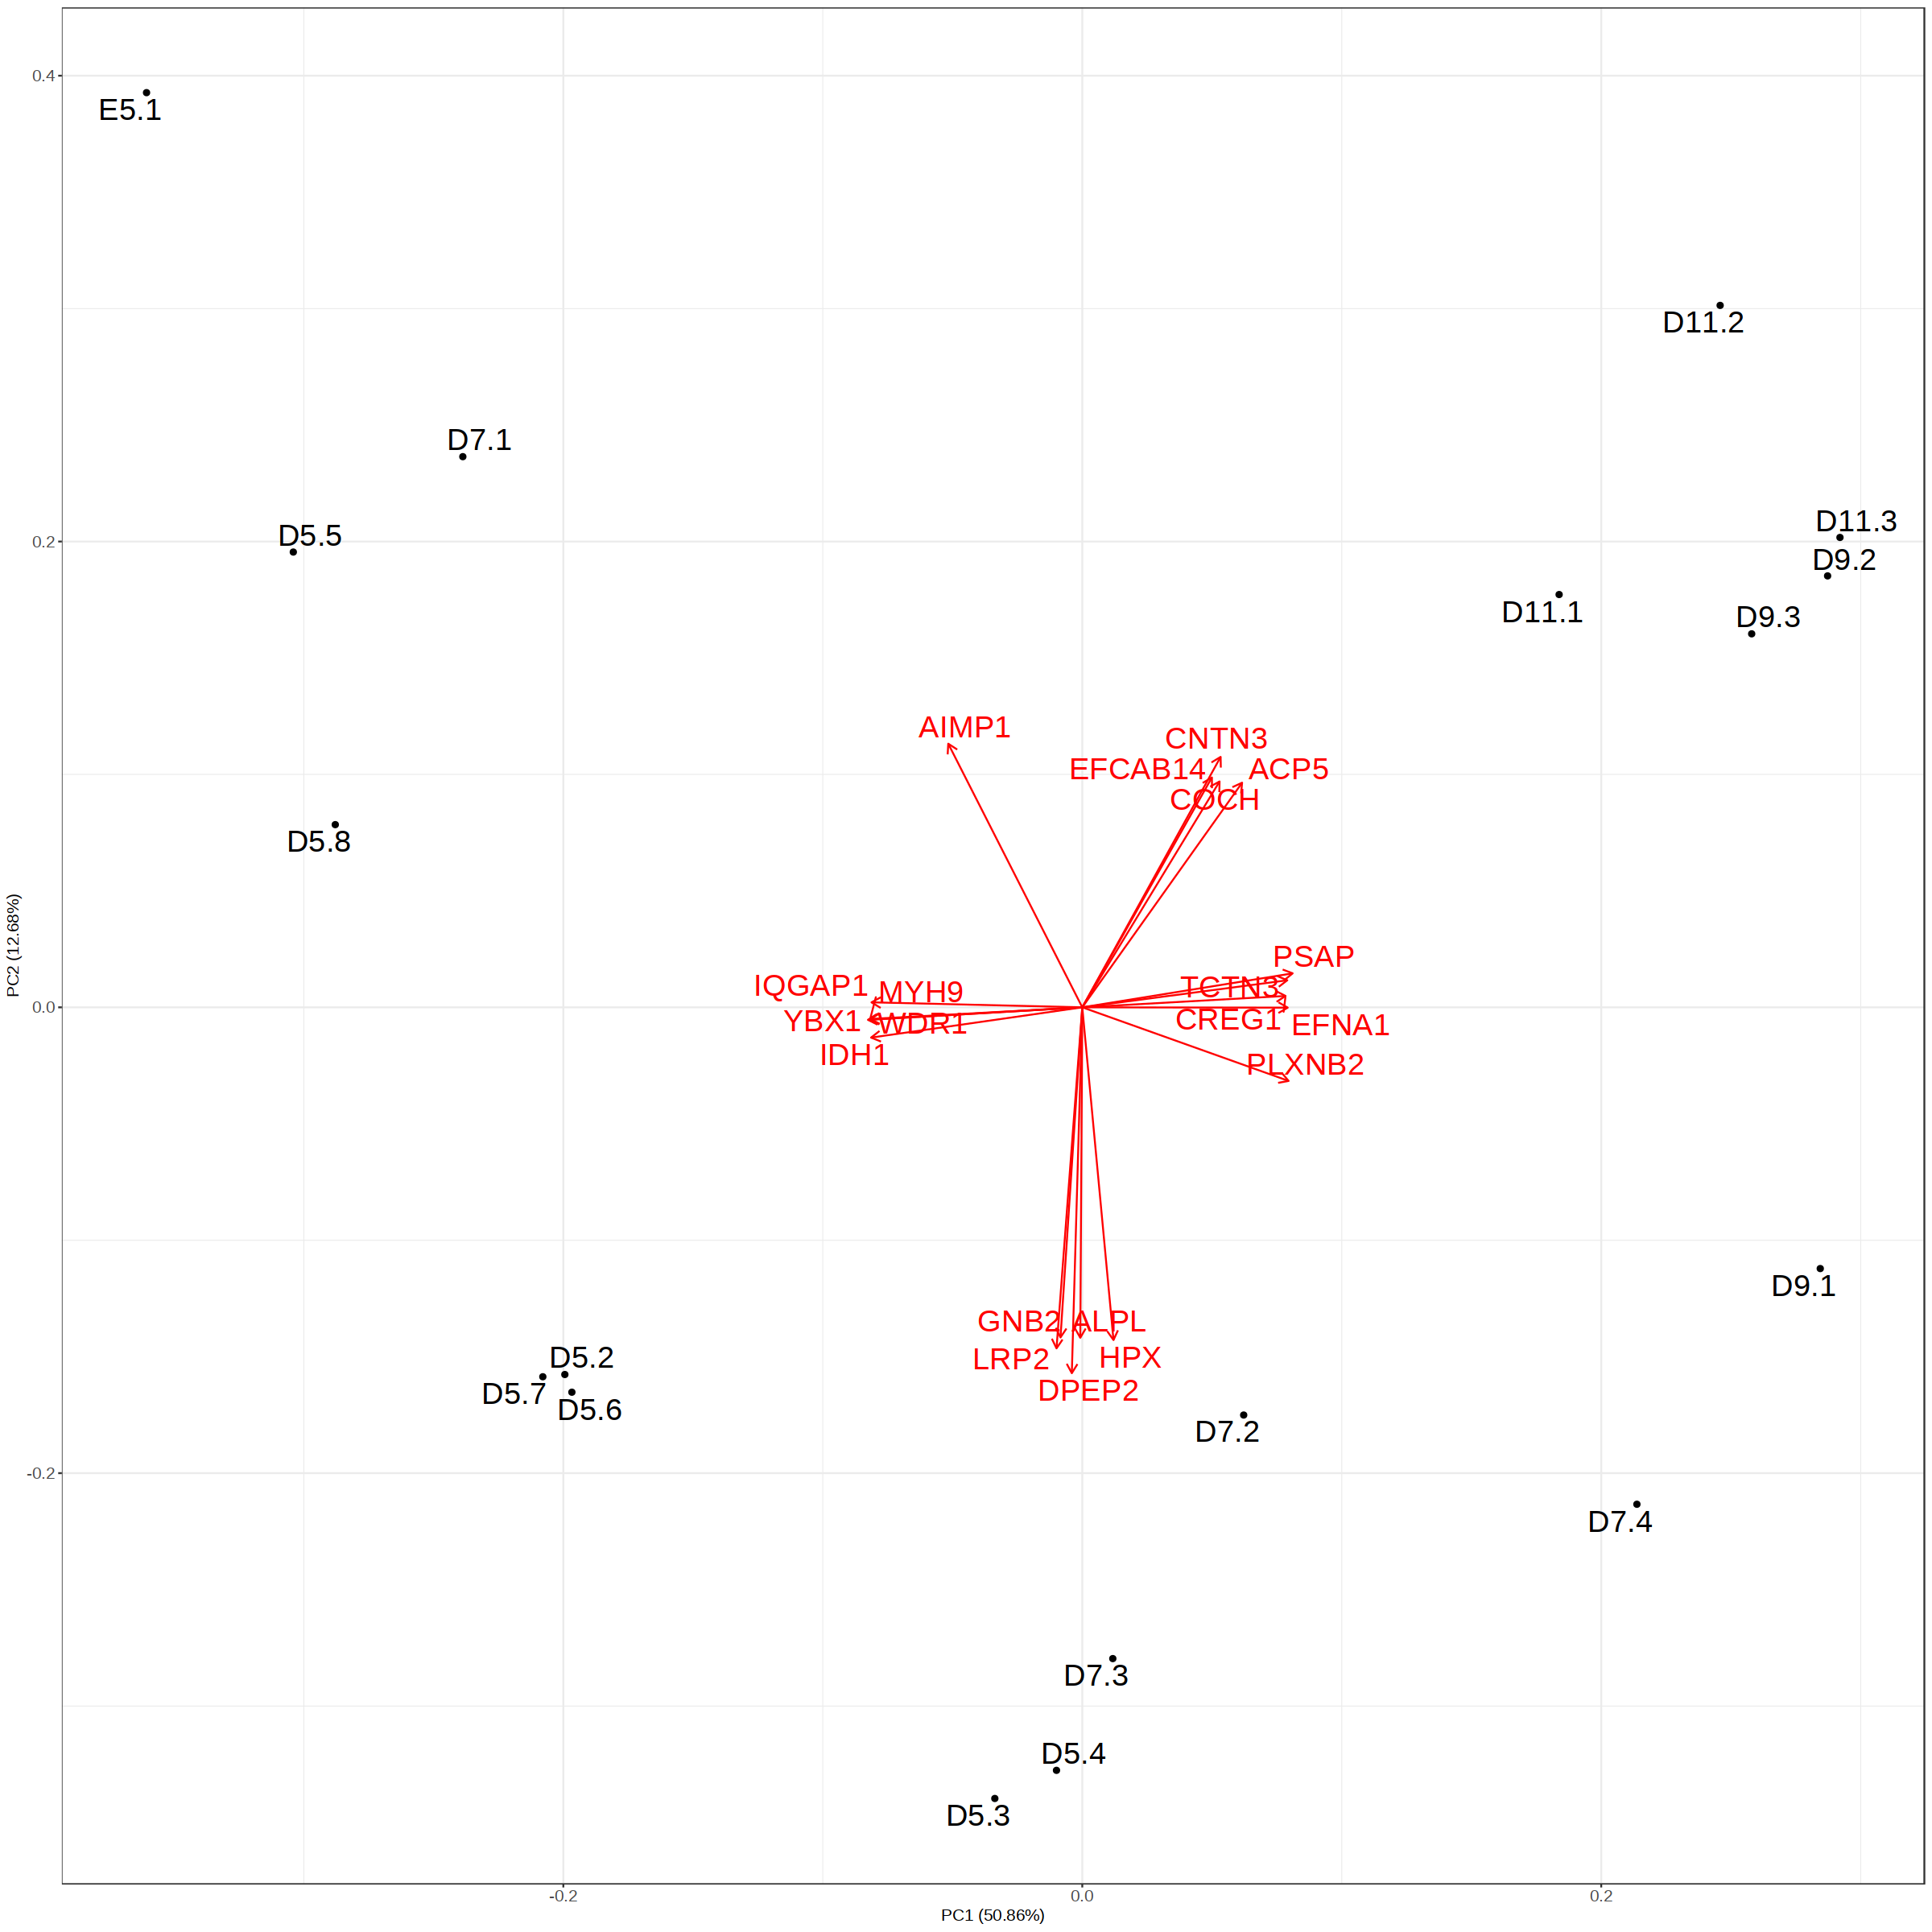

In [5]:
plot

In [6]:
ggsave('/home/adufour/work/notebook/plots/proteomics/PCA.svg', plot, height = 20, width = 20)

In [7]:
# plot adding up all layers we have seen so far
plot <- ggplot(data=differential_order_early_late, aes(x=Difference, y=LOG.P.value., col=categories, label=label)) +
        geom_point(size = 0.5) +
        theme_bw() +
        geom_text_repel(max.overlaps = 200) +
        scale_color_manual(values=c("grey", "blue", "red")) +
        expand_limits(x = c(-8.5,8.5)) +
        theme(legend.position = 'right', axis.text = element_text(size=12), axis.title = element_text(size=12), legend.text = element_text(size = 20), legend.title = element_text(size = 20), legend.key.height=unit(3,"line")) +
        labs(y= "P-value", x = "Fold change") +
        geom_vline(xintercept=c(-1, 1), col="red") +
        geom_hline(yintercept=1, col="red")

In [8]:
ggsave('/home/adufour/work/notebook/plots/proteomics/volcano_early_vs_late.svg', plot, height = 20, width = 20)

In [9]:
# plot adding up all layers we have seen so far
plot <- ggplot(data=differential_order_early_intermediate, aes(x=Difference, y=P.value, col=categories, label=label)) +
        geom_point(size = 0.5) +
        theme_bw() +
        geom_text_repel(max.overlaps = 200) +
        scale_color_manual(values=c("grey", "blue", "red")) +
        expand_limits(x = c(-8.5,8.5)) +
        theme(legend.position = 'right', axis.text = element_text(size=12), axis.title = element_text(size=12), legend.text = element_text(size = 20), legend.title = element_text(size = 20), legend.key.height=unit(3,"line")) +
        labs(y= "P-value", x = "Fold change") +
        geom_vline(xintercept=c(-1, 1), col="red") +
        geom_hline(yintercept=0.05, col="red")

In [10]:
ggsave('/home/adufour/work/notebook/plots/proteomics/volcano_early_vs_intermediate.svg', plot, height = 20, width = 20)

In [11]:
# plot adding up all layers we have seen so far
plot <- ggplot(data=differential_order_intermediate_late, aes(x=Difference, y=P.value, col=categories, label=label)) +
        geom_point(size = 0.5) +
        theme_bw() +
        geom_text_repel(max.overlaps = 200) +
        scale_color_manual(values=c("grey", "blue", "red")) +
        expand_limits(x = c(-8.5,8.5)) +
        theme(legend.position = 'right', axis.text = element_text(size=12), axis.title = element_text(size=12), legend.text = element_text(size = 20), legend.title = element_text(size = 20), legend.key.height=unit(3,"line")) +
        labs(y= "P-value", x = "Fold change") +
        geom_vline(xintercept=c(-1, 1), col="red") +
        geom_hline(yintercept=0.05, col="red")

In [12]:
ggsave('/home/adufour/work/notebook/plots/proteomics/volcano_intermediate_vs_late.svg', plot, height = 20, width = 20)

In [13]:
p0<-autoplot(kmeans(t(expression_table), 3, iter = 50),
             data = t(expression_table),
             label = TRUE,
             label.size = 8,
             label.repel = TRUE,
             loadings = TRUE,
             loadings.label = TRUE,
             loadings.label.size = 8,
             loadings.label.repel = TRUE)

In [14]:
variable_genes <- unique(c(p0$layers[[3]]$data[order(p0$layers[[3]]$data$PC1),][1:25,]$rownames, p0$layers[[3]]$data[order(p0$layers[[3]]$data$PC2),][1:25,]$rownames, p0$layers[[3]]$data[order(p0$layers[[3]]$data$PC1,decreasing = TRUE),][1:25,]$rownames, p0$layers[[3]]$data[order(p0$layers[[3]]$data$PC2,decreasing = TRUE),][1:25,]$rownames))

In [15]:
options(repr.plot.width=15, repr.plot.height=80) # To set the figure size in Jupyter
mat <- expression_table[variable_genes,] %>%
  scale(center = T, scale=T)
col_fun <- colorRamp2(seq(min(mat), max(mat), length = 100), colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(100))
lgd <- list(title = "Prtoein levels", legend_height = unit(6, "cm"), grid_width = unit(1, "cm"), labels_gp = gpar(fontsize = 20), title_gp = gpar(fontsize = 18))
svglite('/home/adufour/work/notebook/plots/proteomics/proteome_heatmap.svg', width = 10, height = 30)
hm <- draw(ComplexHeatmap::Heatmap(mat, col = col_fun, rect_gp = gpar(col = "grey", lwd = 1), row_names_gp = grid::gpar(fontsize=24),
                                   column_names_gp = grid::gpar(fontsize=16, fontface='italic'), heatmap_legend_param = lgd), padding = unit(c(2, 2, 2, 2), "mm"))
dev.off()

png 
  2